In [1]:
import torch
import matplotlib.pyplot as plt
from torch_sampling import reservoir_sampling

# Checking non-contiguous tensors

In [2]:
x = torch.arange(10)
y = x[::3]
for t in [x, y]:
    print(t.is_contiguous())

True
False


In [3]:
k=3
for _ in range(5):
    print(reservoir_sampling(y, k))

tensor([0, 3, 9])
tensor([0, 3, 6])
tensor([0, 3, 9])
tensor([0, 9, 6])
tensor([0, 9, 6])


In [4]:
x = torch.arange(10).cuda()
y = x[::3]
for t in [x, y]:
    print(t.is_contiguous())

True
False


In [5]:
k=3
for _ in range(5):
    print(reservoir_sampling(y, k))

tensor([9, 3, 6], device='cuda:0')
tensor([9, 3, 6], device='cuda:0')
tensor([9, 3, 6], device='cuda:0')
tensor([0, 3, 9], device='cuda:0')
tensor([0, 9, 6], device='cuda:0')


# Check performance for multi-d tensors

In [6]:
x = torch.arange(10**4).view(-1, 2)
n = x.size(0)
k = 3
idx = torch.arange(n)

In [7]:
%timeit x[torch.randperm(n)[:k]]

92 µs ± 119 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [8]:
%timeit x[reservoir_sampling(idx, k)]

32.9 µs ± 59 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Checking the performance

In [9]:
x = torch.arange(10**4)

# Case 1: k big

In [10]:
k = 9000

In [11]:
%timeit reservoir_sampling(x, k)

76 µs ± 72.1 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [12]:
%timeit x[torch.randperm(x.numel())[:k]]

238 µs ± 421 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Case 2: k small

In [13]:
k = 100

In [14]:
%timeit reservoir_sampling(x, k)

23.8 µs ± 71.2 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [15]:
%timeit x[torch.randperm(x.numel())[:k]]

173 µs ± 49.9 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Case 3: k medium

In [16]:
k = 4500

In [17]:
%timeit reservoir_sampling(x, k)

132 µs ± 69.3 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [18]:
%timeit x[torch.randperm(x.numel())[:k]]

208 µs ± 168 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# CUDA vs CPU

In [6]:
x_cpu = torch.arange(10**7)
x_cuda = x_cpu.cuda()
k = 10**4

In [7]:
%timeit reservoir_sampling(x_cpu, k)

23 ms ± 350 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
%timeit reservoir_sampling(x_cuda, k)

8.76 ms ± 18.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
weights_cpu = torch.ones(10**7).double()
weights_cuda = weights_cpu.cuda()

In [10]:
%timeit reservoir_sampling(x_cpu, weights_cpu, k)

374 ms ± 37.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%timeit reservoir_sampling(x_cuda, weights_cuda, k)

317 ms ± 69.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Checking distributions - Uniform

In [2]:
x = torch.arange(10)

### CPP Extension

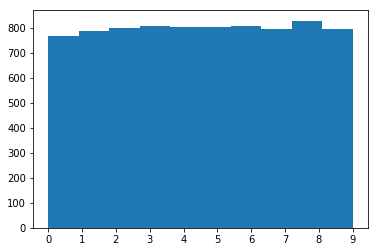

In [3]:
k = 8
samples = []
for _ in range(1000):
    samples.extend(reservoir_sampling(x, k).numpy())
plt.hist(samples)
plt.xticks(range(x.numel()))
plt.show()

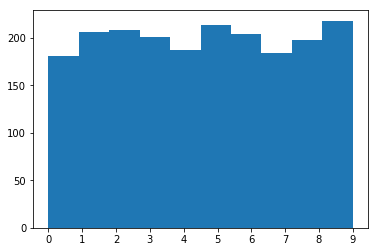

In [4]:
k = 2
samples = []
for _ in range(1000):
    samples.extend(reservoir_sampling(x, k).numpy())
plt.hist(samples)
plt.xticks(range(x.numel()))
plt.show()

### CUDA Extension

In [5]:
x = x.cuda()

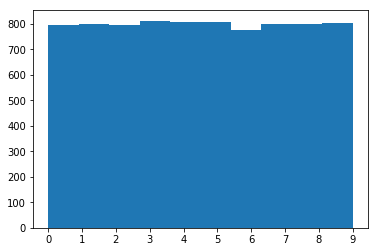

In [6]:
k = 8
samples = []
for _ in range(1000):
    samples.extend(reservoir_sampling(x, k).cpu().numpy())
plt.hist(samples)
plt.xticks(range(x.numel()))
plt.show()

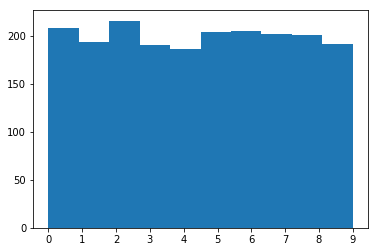

In [8]:
k = 2
samples = []
for _ in range(1000):
    samples.extend(reservoir_sampling(x, k).cpu().numpy())
plt.hist(samples)
plt.xticks(range(x.numel()))
plt.show()

# Checking distributions - Weighted

In [18]:
x = torch.arange(10)
weights = torch.Tensor([1, 1, 5, 5, 5, 1, 7, 2, 2, 2]).float()

### CPP Extension

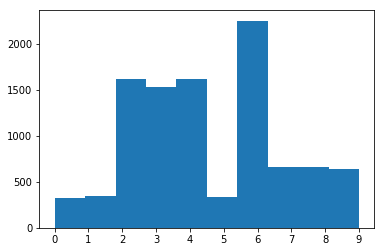

In [19]:
k = 1
samples = []
for _ in range(10000):
    samples.extend(reservoir_sampling(x, weights, k).cpu().numpy())
plt.hist(samples)
plt.xticks(range(x.numel()))
plt.show()

### CUDA Extension

In [20]:
x = x.cuda()
weights = weights.cuda()

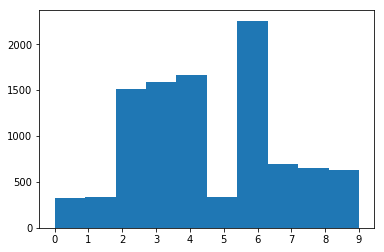

In [21]:
k = 1
samples = []
for _ in range(10000):
    samples.extend(reservoir_sampling(x, weights, k).cpu().numpy())
plt.hist(samples)
plt.xticks(range(x.numel()))
plt.show()